# Bat Tracking Exploratory Data Analysis

**NAME:** Jake Rood

**LAST UPDATE:** 07-17-2024

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('final-data.csv')

## DESCRIBE NUMERIC DATA

In [2]:
data.describe()

,id,swings_competitive,avg_bat_speed,swing_length,hard_swing_rate,squared_up_per_swing,blast_per_swing,whiff_per_swing,PA,AB,AVG,SLG,HR%,BB%,K%,wRC+,EV,Barrel%,HardHit%
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,641602.881041,411.271375,71.528398,7.319879,0.225556,0.261139,0.109672,0.225618,276.535316,247.914498,0.248231,0.403910,0.032986,0.081937,0.215532,104.237538,89.120022,0.081397,0.396524
std,48438.033922,98.466132,2.577762,0.380041,0.181420,0.046802,0.032201,0.058720,61.751878,54.547222,0.033995,0.071049,0.016128,0.029484,0.058387,28.520511,2.326148,0.041060,0.077389
min,453568.000000,221.000000,62.933491,5.941353,0.000000,0.144487,0.022599,0.047297,170.000000,142.000000,0.171875,0.226496,0.000000,0.015625,0.055556,26.138796,83.724969,0.007042,0.181818
25%,622761.000000,332.000000,69.785584,7.082014,0.076087,0.227139,0.087227,0.184343,226.000000,206.000000,0.226950,0.353448,0.021127,0.061538,0.174051,86.040740,87.579508,0.051181,0.352518
50%,663624.000000,403.000000,71.643281,7.305111,0.184116,0.257336,0.108108,0.222615,272.000000,245.000000,0.247678,0.400000,0.031792,0.079412,0.209231,102.927125,88.975494,0.076364,0.393701
75%,670623.000000,486.000000,73.113770,7.546893,0.334586,0.291304,0.130261,0.268730,333.000000,295.000000,0.271318,0.445748,0.041056,0.102941,0.257895,119.643367,90.685915,0.104938,0.448430
max,701538.000000,656.000000,80.738584,8.604846,0.981132,0.448770,0.199616,0.379699,395.000000,362.000000,0.362069,0.718033,0.104918,0.193370,0.394052,217.990817,97.080314,0.288372,0.627907


## VISUALIZE AVERAGE BAT SPEED

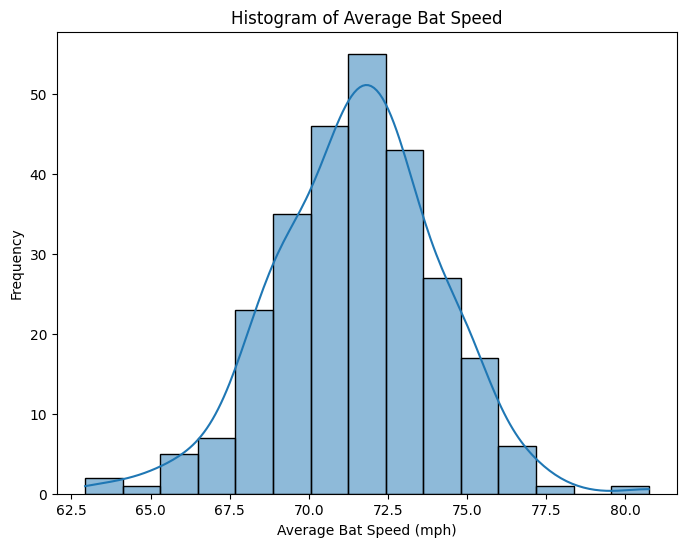

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(data['avg_bat_speed'], bins=15, kde=True)
plt.title('Histogram of Average Bat Speed')
plt.xlabel('Average Bat Speed (mph)')
plt.ylabel('Frequency')

plt.show()

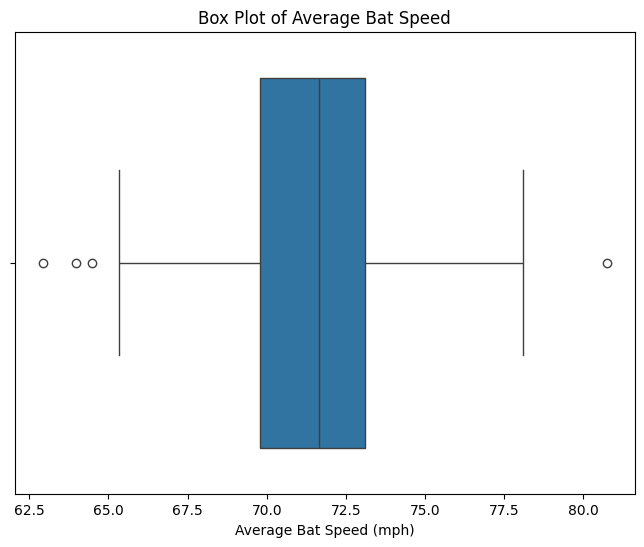

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['avg_bat_speed'])
plt.title('Box Plot of Average Bat Speed')
plt.xlabel('Average Bat Speed (mph)')
plt.show()

## VISUALIZE SWING LENGTH

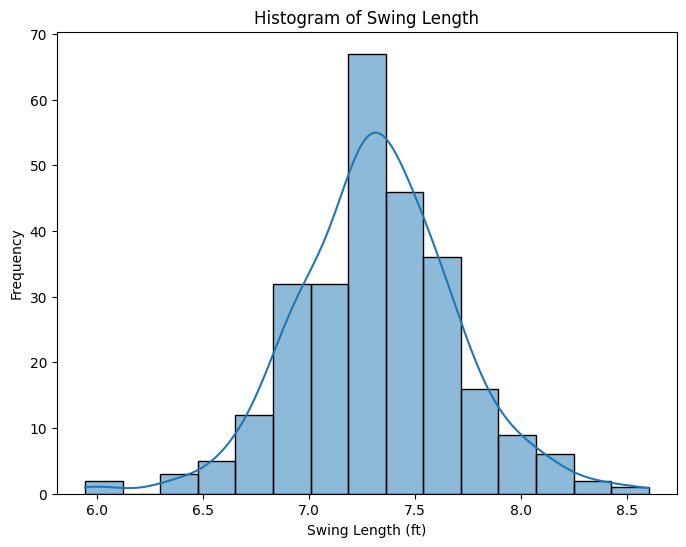

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data['swing_length'], bins=15, kde=True)
plt.title('Histogram of Swing Length')
plt.xlabel('Swing Length (ft)')
plt.ylabel('Frequency')

plt.show()

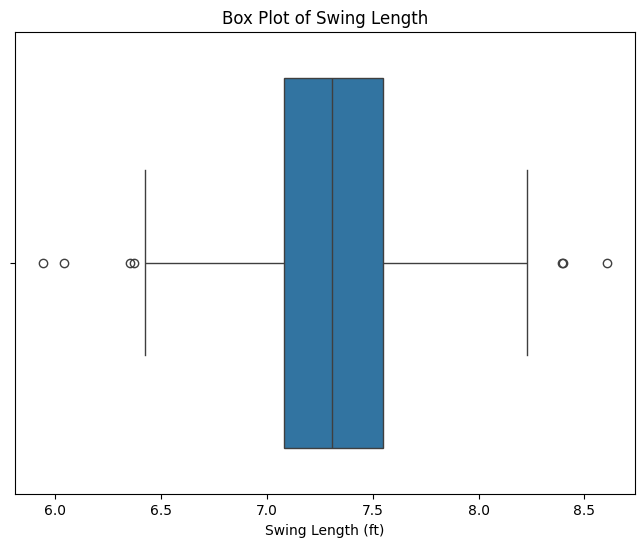

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['swing_length'])
plt.title('Box Plot of Swing Length')
plt.xlabel('Swing Length (ft)')
plt.show()

## BAT SPEED AND SWING LENGTH RELATIONSHIP

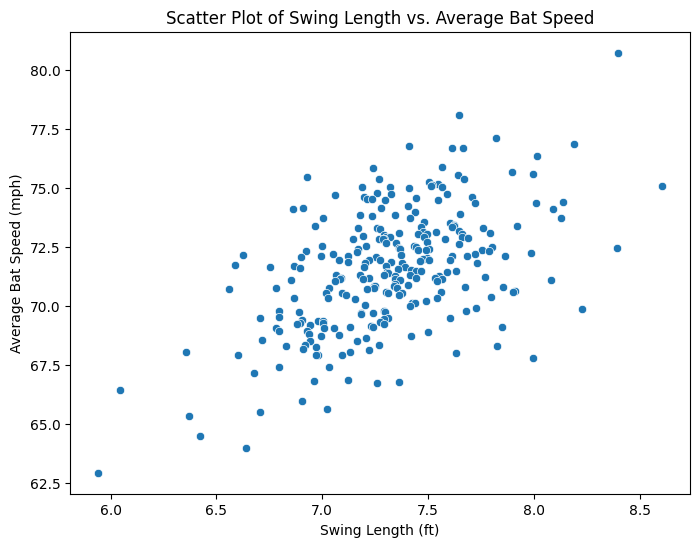

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='swing_length', y='avg_bat_speed')
plt.title('Scatter Plot of Swing Length vs. Average Bat Speed')
plt.xlabel('Swing Length (ft)')
plt.ylabel('Average Bat Speed (mph)')
plt.show()

## VISUALIZE OUTCOME STATISTICS

In [8]:
outcomes = data[['squared_up_per_swing', 'blast_per_swing', 'whiff_per_swing', 'AVG', 'SLG', 'HR%', 'K%', 'wRC+', 'EV', 'Barrel%', 'HardHit%']]

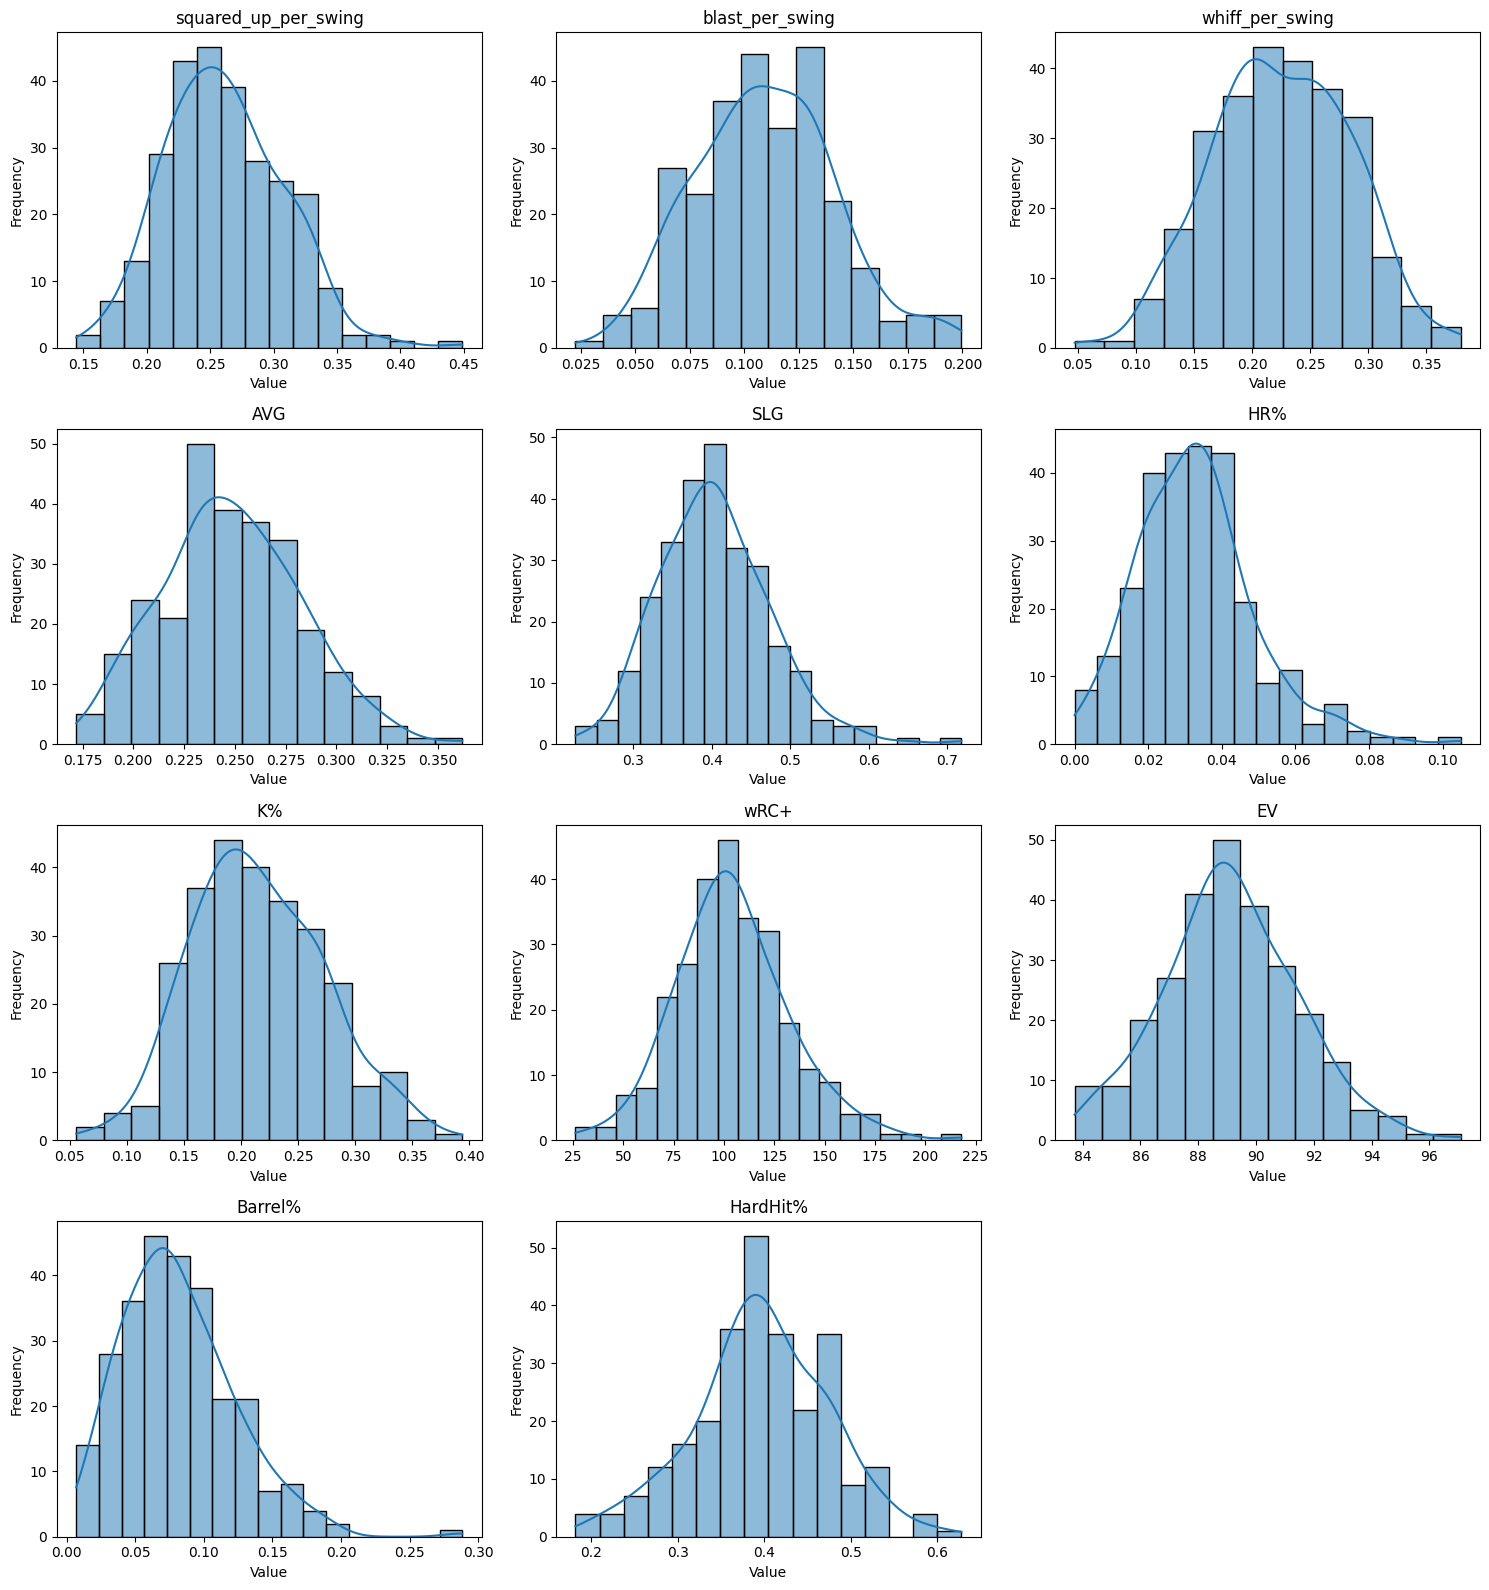

In [9]:
# Define the number of columns and rows for the subplot grid
num_columns = len(outcomes.columns)
num_rows = (num_columns + 2) // 3  # Adjust rows based on number of columns

# Create a figure with subplots
plt.figure(figsize=(15, num_rows * 4))

# Loop through each column and create a subplot for its histogram
for i, column in enumerate(outcomes.columns):
    plt.subplot(num_rows, 3, i + 1)  # Create a subplot in the grid
    sns.histplot(outcomes[column], kde=True)  # Use histplot with seaborn
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot params for a better fit
plt.show()

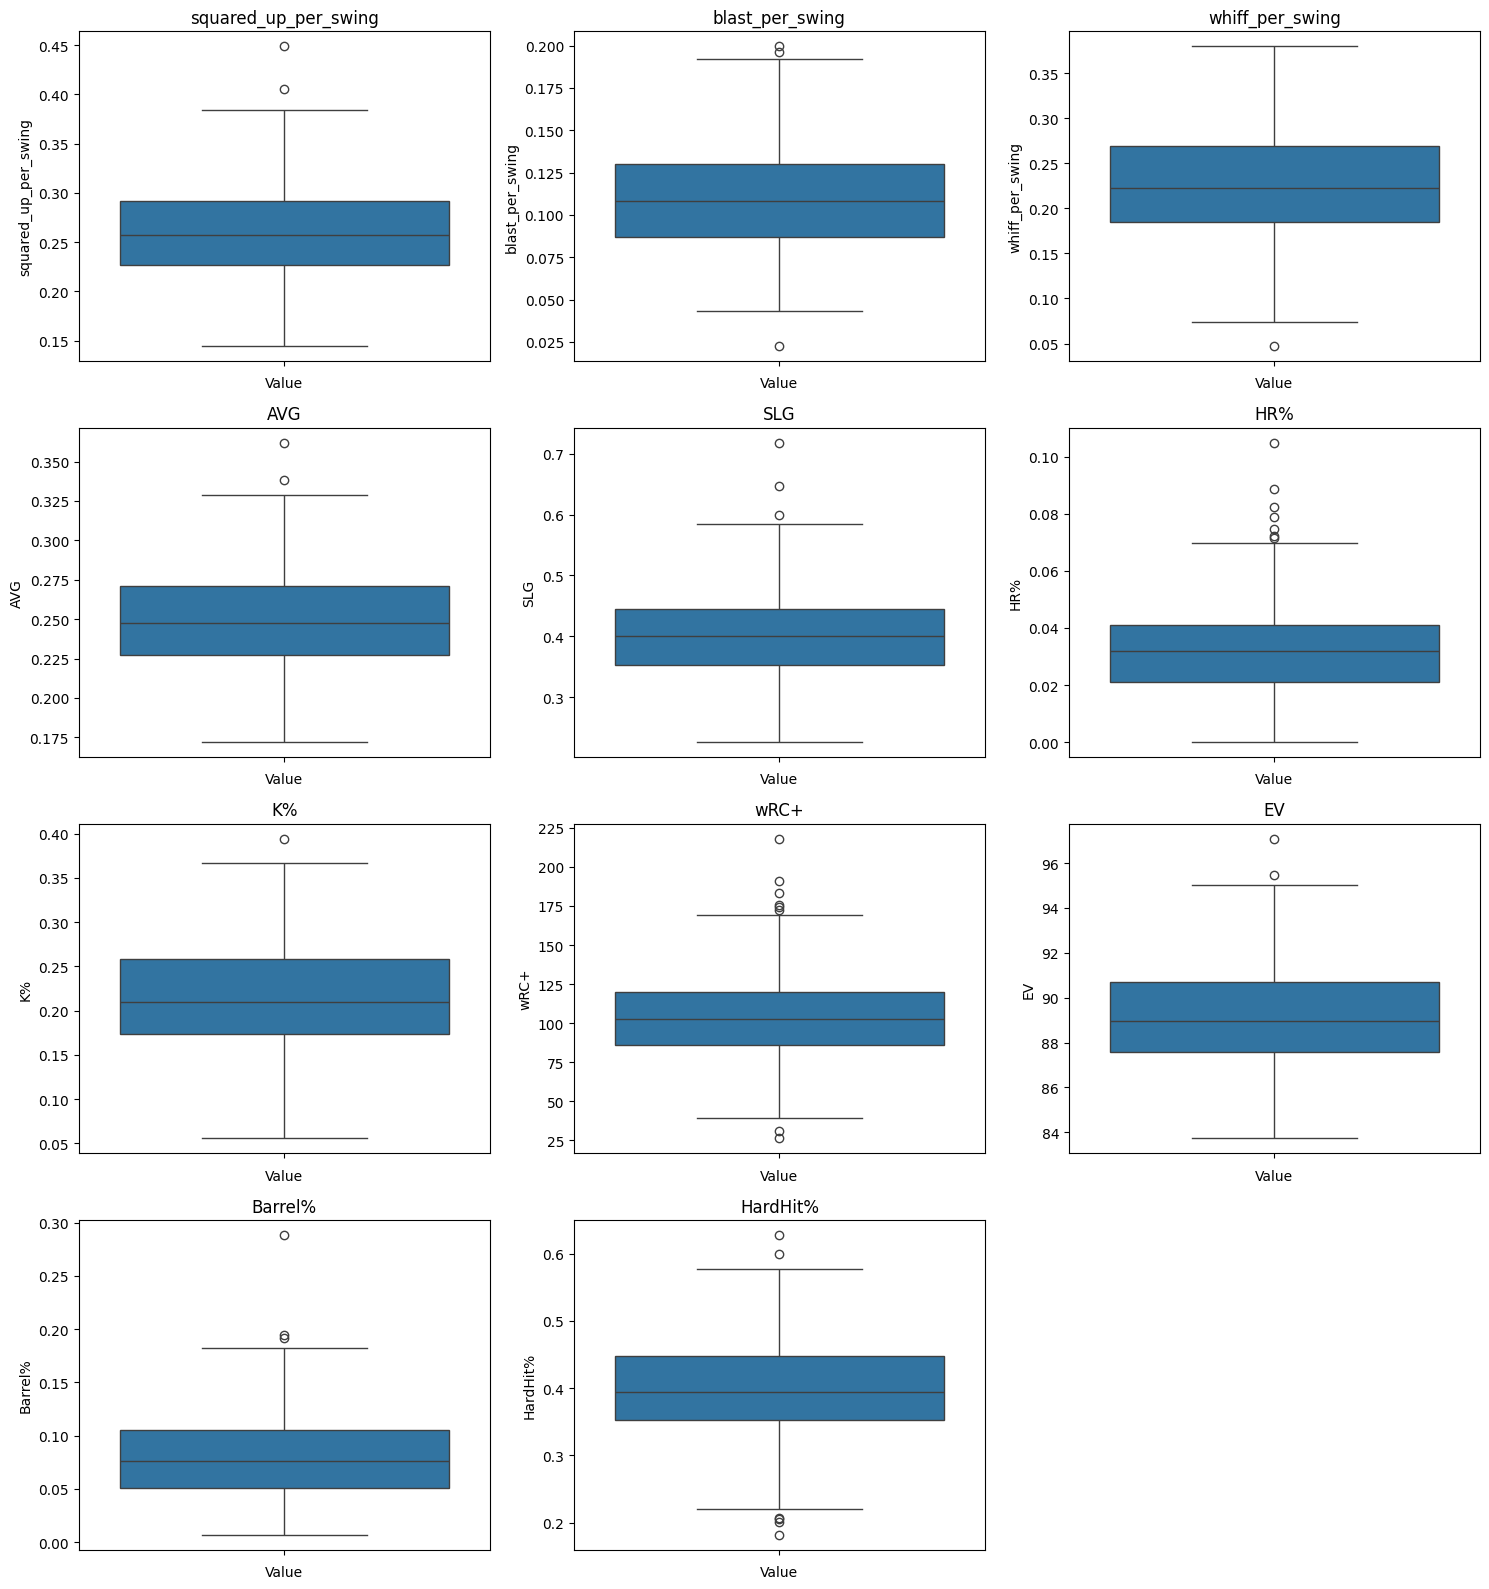

In [10]:
# Create a figure with subplots
plt.figure(figsize=(15, num_rows * 4))

# Loop through each column and create a subplot for its box plot
for i, column in enumerate(outcomes.columns):
    plt.subplot(num_rows, 3, i + 1)  # Create a subplot in the grid
    sns.boxplot(data=outcomes[column])  # Use boxplot with seaborn
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

## CORRELATIONS

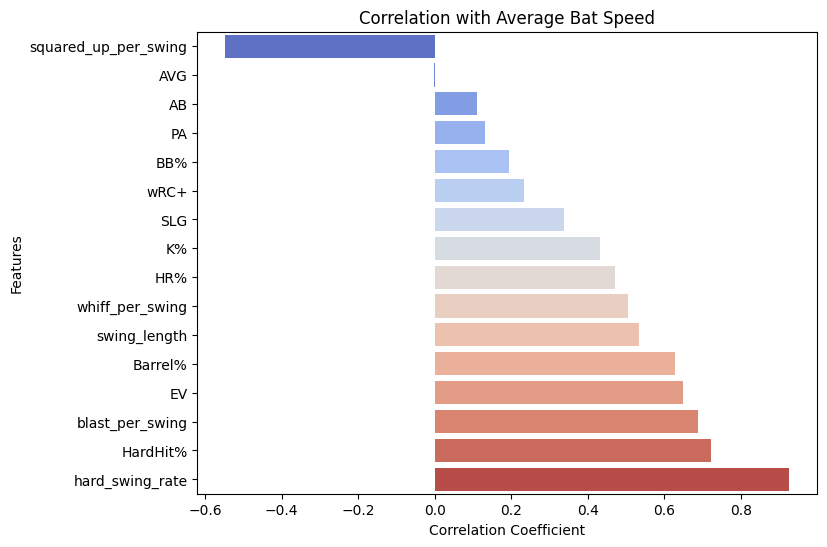

In [11]:
columns_to_correlate = ['swing_length', 'hard_swing_rate', 'squared_up_per_swing',
                        'blast_per_swing', 'whiff_per_swing', 'PA', 'AB', 'AVG',
                        'SLG', 'HR%', 'BB%', 'K%', 'wRC+', 'EV', 'Barrel%', 'HardHit%']

# Calculate correlation with avg_bat_speed
correlations = data[columns_to_correlate + ['avg_bat_speed']].corr()['avg_bat_speed'].drop('avg_bat_speed')

correlations.sort_values(inplace=True)

# Prepare data for plotting
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm', hue='Feature', dodge=False)
plt.title('Correlation with Average Bat Speed')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

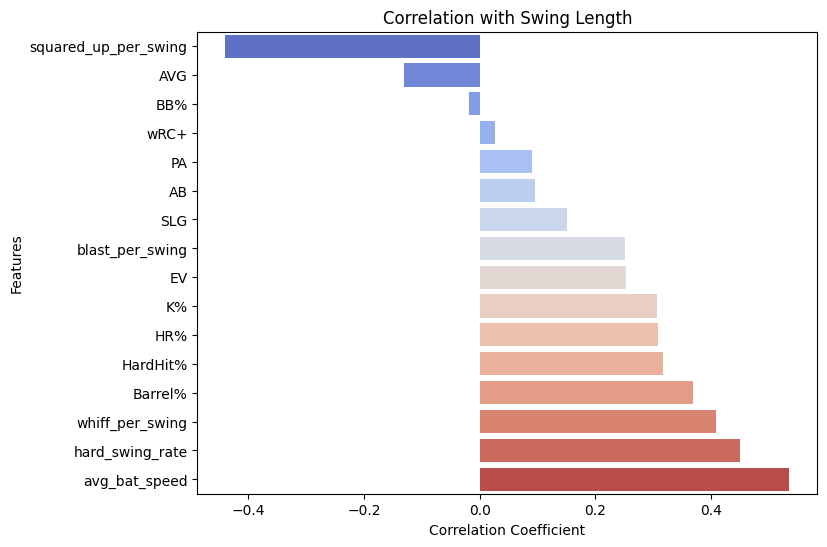

In [12]:
columns_to_correlate = ['avg_bat_speed', 'hard_swing_rate', 'squared_up_per_swing',
                        'blast_per_swing', 'whiff_per_swing', 'PA', 'AB', 'AVG',
                        'SLG', 'HR%', 'BB%', 'K%', 'wRC+', 'EV', 'Barrel%', 'HardHit%']

# Calculate correlation with swing_length
correlations = data[columns_to_correlate + ['swing_length']].corr()['swing_length'].drop('swing_length')

correlations.sort_values(inplace=True)

# Prepare data for plotting
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm', hue='Feature', dodge=False)
plt.title('Correlation with Swing Length')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

## BAT SPEED AND SWING LENGTH GROUPS

In [13]:
# Calculate the median of avg_bat_speed and swing_length
median_bat_speed = data['avg_bat_speed'].median()
median_swing_length = data['swing_length'].median()

# Create the swing_speed_type and swing_length_type column
data['bat_speed_type'] = np.where(data['avg_bat_speed'] > median_bat_speed, 1, 0)
data['swing_length_type'] = np.where(data['swing_length'] > median_swing_length, 1, 0)
data[['Name', 'avg_bat_speed', 'swing_length', 'bat_speed_type', 'swing_length_type']]

,Name,avg_bat_speed,swing_length,bat_speed_type,swing_length_type
0,Giancarlo Stanton,80.738584,8.399277,1,1
1,Oneil Cruz,78.105810,7.646641,1,1
2,Kyle Schwarber,77.136460,7.820547,1,1
3,Aaron Judge,76.864979,8.191793,1,1
4,Matt Chapman,76.779991,7.409663,1,1
...,...,...,...,...,...
264,Nolan Schanuel,65.502270,6.705054,0,0
265,Justin Turner,65.336476,6.369270,0,0
266,Steven Kwan,64.493166,6.421381,0,0
267,Nicky Lopez,63.975472,6.639100,0,0


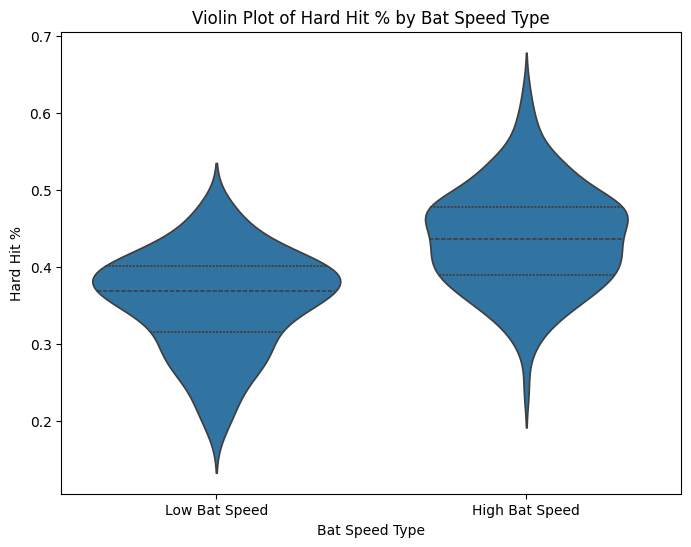

In [14]:
# Create a violin plot showing Hard Hit % by Bat Speed Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='bat_speed_type', y='HardHit%', data=data, inner='quartile')
plt.title('Violin Plot of Hard Hit % by Bat Speed Type')
plt.xlabel('Bat Speed Type')
plt.ylabel('Hard Hit %')
plt.xticks([0, 1], ['Low Bat Speed', 'High Bat Speed'])
plt.show()

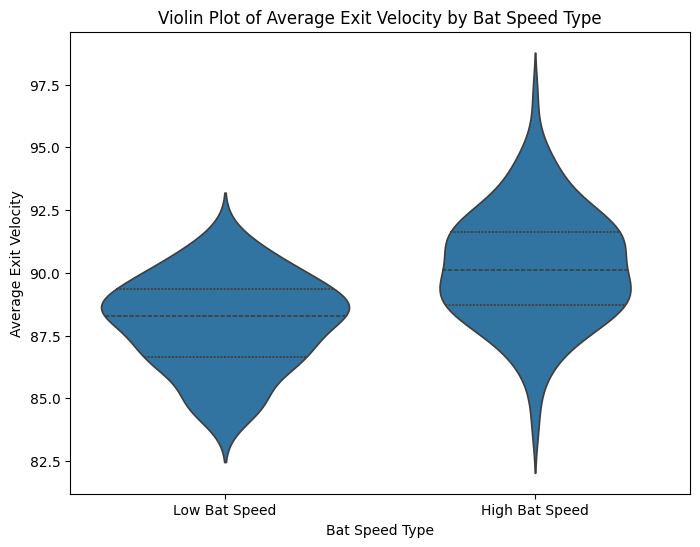

In [15]:
# Create a violin plot showing EV by Bat Speed Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='bat_speed_type', y='EV', data=data, inner='quartile')
plt.title('Violin Plot of Average Exit Velocity by Bat Speed Type')
plt.xlabel('Bat Speed Type')
plt.ylabel('Average Exit Velocity')
plt.xticks([0, 1], ['Low Bat Speed', 'High Bat Speed'])
plt.show()

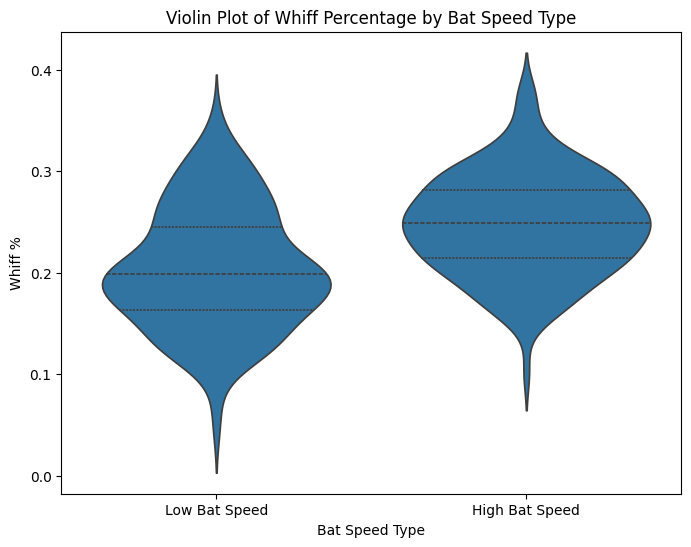

In [16]:
# Create a violin plot showing Whiff % by Bat Speed Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='bat_speed_type', y='whiff_per_swing', data=data, inner='quartile')
plt.title('Violin Plot of Whiff Percentage by Bat Speed Type')
plt.xlabel('Bat Speed Type')
plt.ylabel('Whiff %')
plt.xticks([0, 1], ['Low Bat Speed', 'High Bat Speed'])
plt.show()

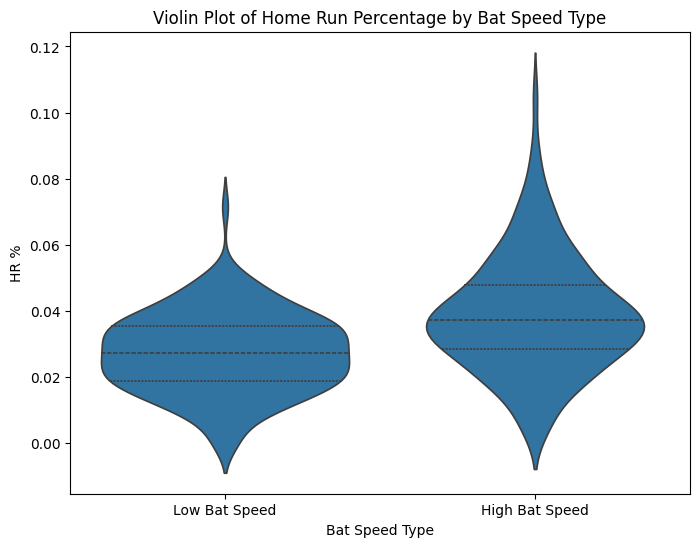

In [17]:
# Create a violin plot showing HR% by Bat Speed Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='bat_speed_type', y='HR%', data=data, inner='quartile')
plt.title('Violin Plot of Home Run Percentage by Bat Speed Type')
plt.xlabel('Bat Speed Type')
plt.ylabel('HR %')
plt.xticks([0, 1], ['Low Bat Speed', 'High Bat Speed'])
plt.show()

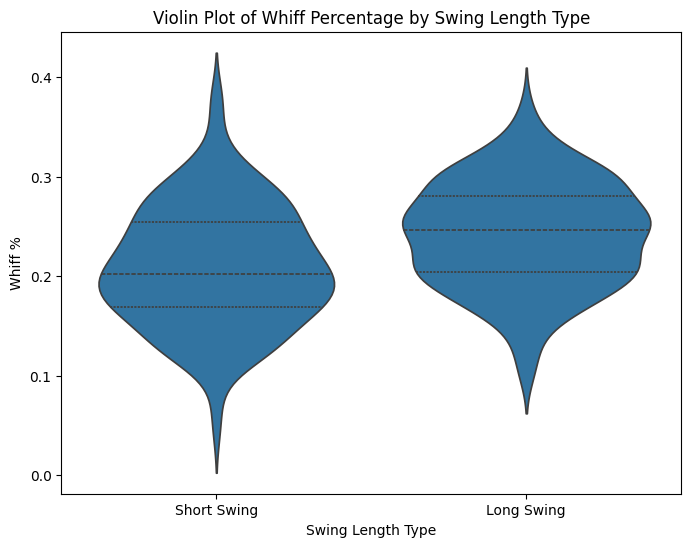

In [18]:
# Create a violin plot showing Whiff % by Swing Length Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='swing_length_type', y='whiff_per_swing', data=data, inner='quartile')
plt.title('Violin Plot of Whiff Percentage by Swing Length Type')
plt.xlabel('Swing Length Type')
plt.ylabel('Whiff %')
plt.xticks([0, 1], ['Short Swing', 'Long Swing'])
plt.show()

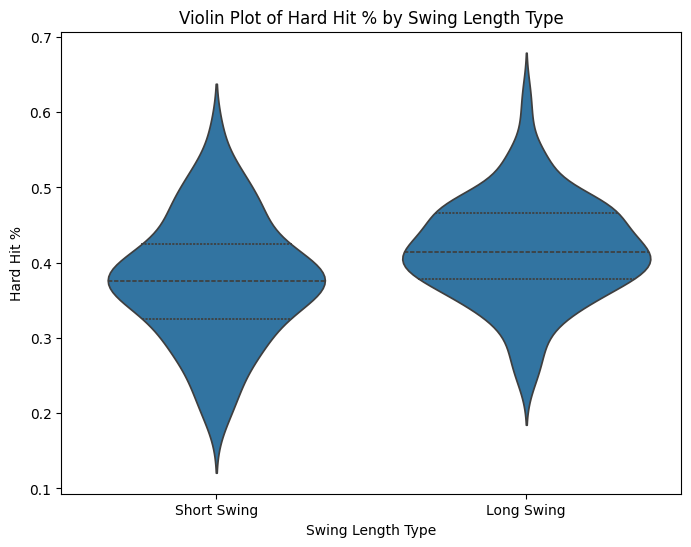

In [19]:
# Create a violin plot showing Hard Hit % by Swing Length Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='swing_length_type', y='HardHit%', data=data, inner='quartile')
plt.title('Violin Plot of Hard Hit % by Swing Length Type')
plt.xlabel('Swing Length Type')
plt.ylabel('Hard Hit %')
plt.xticks([0, 1], ['Short Swing', 'Long Swing'])
plt.show()

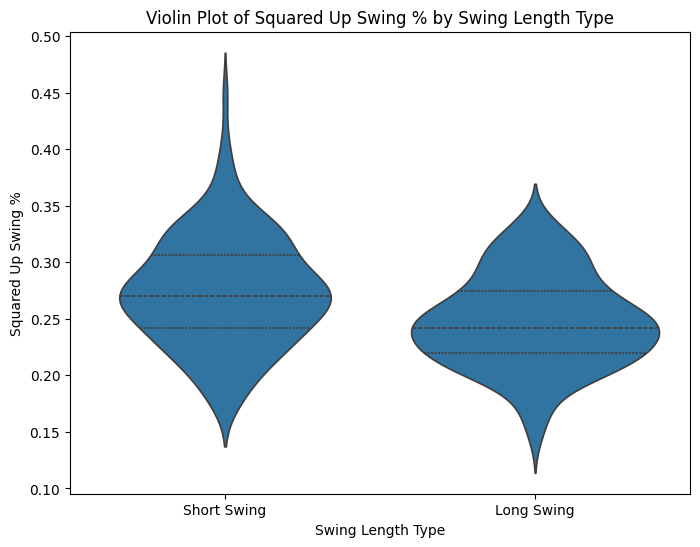

In [20]:
# Create a violin plot showing Squared Up Swing % by Swing Length Type
plt.figure(figsize=(8, 6))
sns.violinplot(x='swing_length_type', y='squared_up_per_swing', data=data, inner='quartile')
plt.title('Violin Plot of Squared Up Swing % by Swing Length Type')
plt.xlabel('Swing Length Type')
plt.ylabel('Squared Up Swing %')
plt.xticks([0, 1], ['Short Swing', 'Long Swing'])
plt.show()